In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [308]:
dataset = pd.read_csv('dataprepocessing.csv')
dataset

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,jenis_kepadatan,Prediksi
0,2021,1,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,1473.0,sepi,3
1,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280.0,sepi,3
2,2021,1,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,28779.0,sepi,3
3,2021,1,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,54998.0,biasa,2
4,2021,1,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284.0,biasa,2
...,...,...,...,...,...,...,...,...
1468,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0.0,tidak ada,4
1469,2021,12,Angkutan Umum Integrasi,12B,Pluit - Senen,0.0,tidak ada,4
1470,2021,12,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,0.0,tidak ada,4
1471,2021,12,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,tidak ada,4


In [309]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(dataset[['jumlah_penumpang']])
dataset['jumlah_penumpang'] = imputer.transform(dataset[['jumlah_penumpang']])
dataset

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,jenis_kepadatan,Prediksi
0,2021,1,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,1473.0,sepi,3
1,2021,1,Mikrotrans,JAK.85,Bintara - Cipinang Indah,20280.0,sepi,3
2,2021,1,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,28779.0,sepi,3
3,2021,1,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,54998.0,biasa,2
4,2021,1,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,60284.0,biasa,2
...,...,...,...,...,...,...,...,...
1468,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0.0,tidak ada,4
1469,2021,12,Angkutan Umum Integrasi,12B,Pluit - Senen,0.0,tidak ada,4
1470,2021,12,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,0.0,tidak ada,4
1471,2021,12,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,tidak ada,4


In [310]:
X = dataset.loc[:,["jenis","jumlah_penumpang"]].values
y = dataset.loc[:, "Prediksi"].values

In [311]:
X

array([['Mikrotrans', 1473.0],
       ['Mikrotrans', 20280.0],
       ['Mikrotrans', 28779.0],
       ...,
       ['Angkutan Umum Integrasi', 0.0],
       ['Angkutan Umum Integrasi', 0.0],
       ['Angkutan Umum Integrasi', 0.0]], dtype=object)

In [312]:
mode_y = np.bincount(y).argmax()

print("Modus pada nilai y:", mode_y)

Modus pada nilai y: 3


In [313]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [315]:
X_train

array([[0.0, 0.0, 1.0, 49639.0],
       [1.0, 0.0, 0.0, 22033.0],
       [1.0, 0.0, 0.0, 0.0],
       ...,
       [1.0, 0.0, 0.0, 8148.0],
       [0.0, 1.0, 0.0, 496285.0],
       [0.0, 1.0, 0.0, 484181.0]], dtype=object)

In [316]:
y_train

array([3, 3, 4, ..., 3, 1, 1], dtype=int64)

In [317]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [318]:
X_train

array([[-0.68988103, -0.33601075,  0.85781645, -0.24643942],
       [ 1.4495253 , -0.33601075, -1.16575056, -0.47345185],
       [ 1.4495253 , -0.33601075, -1.16575056, -0.65463583],
       ...,
       [ 1.4495253 , -0.33601075, -1.16575056, -0.58763238],
       [-0.68988103,  2.97609524, -1.16575056,  3.42646487],
       [-0.68988103,  2.97609524, -1.16575056,  3.32693004]])

In [326]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [327]:
y_pred = classifier.predict(X_test)

In [328]:
print(y_pred)
print(y_test)

[2 2 3 3 3 4 2 3 3 2 2 2 3 3 3 2 3 2 2 3 3 4 3 2 3 3 2 2 2 3 1 3 2 2 4 2 3
 3 2 1 3 1 2 3 1 3 3 3 3 1 2 1 3 3 3 3 2 3 3 2 3 2 2 3 3 2 2 1 3 3 2 1 3 2
 2 1 3 2 2 2 3 3 2 2 3 2 1 2 1 2 2 2 2 3 1 2 2 3 3 3 2 3 3 3 2 3 3 2 2 1 1
 3 3 3 4 3 3 2 2 4 3 2 4 3 2 2 3 2 3 3 1 3 3 3 1 3 3 2 3 2 3 3 3 2 3 2 2 3
 2 2 2 2 3 3 2 2 3 3 3 3 1 2 3 3 3 2 2 3 3 3 3 2 2 2 2 3 3 1 3 3 3 3 2 3 2
 2 2 3 2 3 2 3 3 2 3 3 3 1 4 3 3 2 2 3 3 3 3 2 3 1 2 2 2 2 3 2 2 3 2 2 2 3
 3 1 2 3 3 3 2 1 2 2 2 3 3 2 3 2 3 3 3 2 2 2 3 2 2 1 2 2 3 2 3 2 3 2 3 3 1
 2 2 1 3 3 3 2 1 3 2 2 2 2 2 3 3 2 3 2 4 1 2 3 2 3 3 3 2 4 2 1 3 2 3 2 2 2
 3 2 2 2 3 3 1 3 2 1 2 3 2 2 3 2 2 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3 2 3 1
 2 2 3 2 2 2 2 2 3 3 4 1 2 3 3 3 3 2 3 3 1 3 3 3 2 3 1 3 2 3 3 2 2 2 3 2]
[2 2 3 3 3 4 2 3 3 2 2 2 3 3 3 1 3 2 2 3 3 4 3 2 3 3 2 2 2 3 1 3 2 2 3 2 3
 3 2 1 3 1 2 3 1 3 3 3 3 1 2 1 3 3 3 3 2 3 3 2 3 2 2 3 3 2 2 1 3 3 2 1 3 2
 2 1 3 2 2 2 3 3 2 2 3 2 1 2 1 2 2 2 2 3 1 2 2 3 3 3 2 3 3 3 2 3 3 2 2 1 1
 3 3 3 4 3 3 2 2 4 3 2 4 3

In [329]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 34   2   0   0]
 [  0 149   2   0]
 [  0   2 170   2]
 [  0   0   0   8]]


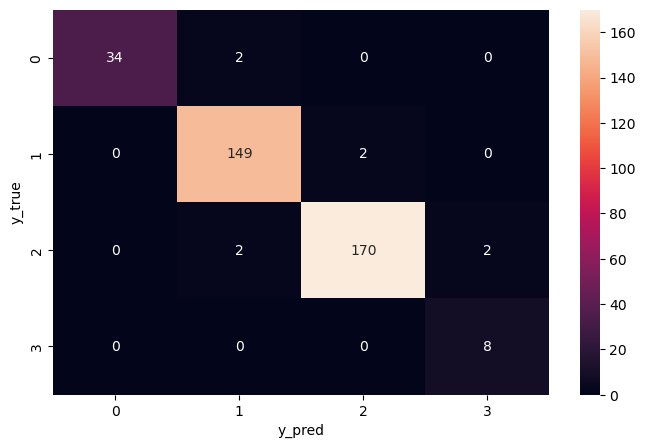

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [331]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        36
           2       0.97      0.99      0.98       151
           3       0.99      0.98      0.98       174
           4       0.80      1.00      0.89         8

    accuracy                           0.98       369
   macro avg       0.94      0.98      0.96       369
weighted avg       0.98      0.98      0.98       369



In [332]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

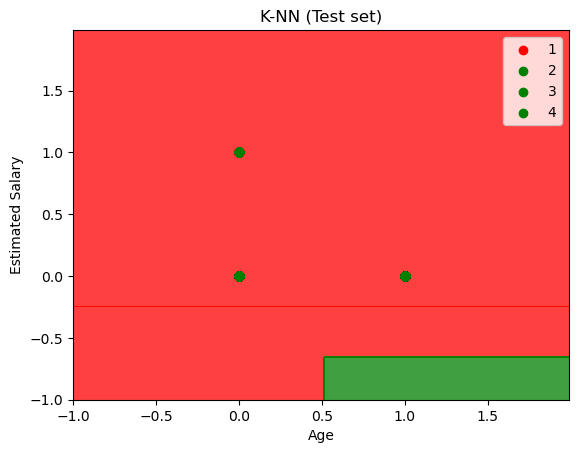

In [333]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))

# Menggunakan predict() secara terpisah untuk setiap fitur yang ingin digunakan
Z = classifier.predict(np.array([X1.ravel(), np.zeros(X1.shape).ravel(), np.zeros(X1.shape).ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
